# Introduction to NLP

**Goal of the lab**: 
Given a set of Shakespeare play, can we:
- Find similarity across the different plays ?
- Find most frequent words per play ?
- Characterize the plays and interprete the results ?

## Pre-requisite
To run this lab, you need to have installed on your system:
- `pandas`
- `matplotlib`
- `seaborn`
- `spacy` (and the english extension by running `python -m spacy download en_core_web_sm`)
- `sklearn`

In [1]:
import pandas as pd
import seaborn as sns
import spacy
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]

# Loading the dataset

The file `dataset.csv` contains the aggregated data of a set of Shakespeare's play.


> This is a reminder from yesterday's session !

In [2]:
df = pd.read_csv("data/dataset.csv")[:10]

**Exercice**:
1. Load the dataset located in "data/dataset.csv"
1. Give the number of individuals and list the columns in the dataset.
2. Give the number of unique plays in the dataset and output a list of them.

In [3]:
df.head()

,Unnamed: 0,Play,PlayerLine
0,0,A Comedy of Errors,A hall in DUKE SOLINUS'S palace. Enter DUKE SO...
1,1,A Midsummer nights dream,"Athens. The palace of THESEUS. Enter THESEUS, ..."
2,2,A Winters Tale,Antechamber in LEONTES' palace. Enter CAMILLO ...
3,3,Alls well that ends well,"Rousillon. The COUNT's palace. Enter BERTRAM, ..."
4,4,Antony and Cleopatra,Alexandria. A room in CLEOPATRA's palace. Ente...


In [4]:
# Loading the data
df = pd.read_csv("data/dataset.csv")[:10]

# Number of individuals
print(f"Number of individuals {df.shape[0]}")
print(f"List of columns: {df.columns}")

# Number of unique plays
print("Number of unique plays")
df.Play.unique()

Number of individuals 10
List of columns: Index(['Unnamed: 0', 'Play', 'PlayerLine'], dtype='object')
Number of unique plays


array(['A Comedy of Errors', 'A Midsummer nights dream', 'A Winters Tale',
       'Alls well that ends well', 'Antony and Cleopatra',
       'As you like it', 'Coriolanus', 'Cymbeline', 'Hamlet', 'Henry IV'],
      dtype=object)

## Cleaning up the data
Textual should be:

- Lemmed
- Cleaned from stop words and punctuation.
  
We will do it using spacy built-in features.

In [5]:
nlp = spacy.load("en_core_web_sm")

test_sentence = "I liked Machine Learning"

doc = nlp(test_sentence)

for token in doc:
    print(token.text)
    print("Lemma " + token.lemma_)
    print("POS " + token.pos_)


I
Lemma I
POS PRON
liked
Lemma like
POS VERB
Machine
Lemma Machine
POS PROPN
Learning
Lemma Learning
POS PROPN


In [6]:
nlp = spacy.load("en_core_web_sm")
# Take the first sentence from the dataset
test_sentence = df["PlayerLine"].iloc[0]
# Run it through spacy nlp function
doc = nlp(test_sentence)

# You can now iteratively access the different parsed version of the words
for token in doc[0:3]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

A a DET DT det X True True
hall hall NOUN NN ROOT xxxx True False
in in ADP IN prep xx True True


In [7]:
lemmed_texts = []
uncapitalized_text = []

In [8]:
lemmed_texts = []
PUNCTUATION = [".", ",", "'", ":", "-"]

for play in df.PlayerLine:
    intermediate_lemmed_text = ""
    parsed_text = nlp(play)
    
    for token in parsed_text:
        if token.lemma_ not in PUNCTUATION:
            intermediate_lemmed_text += " " + token.lemma_.lower()

    lemmed_texts.append(intermediate_lemmed_text)

**Exercice**:
1. Compute for each play the uncapitalized_text (using the `.lower()` function) and lemmed_text from spacy.
1. Add 2 new columns to the dataframe: `uncapitalized_text`and `lemmed_text`.

**Bonus**: Add a new column `cleaned_text` which contains the final text: start with the column `lemmed_text` and remove the stop words contained in `spacy.lang.en.stop_words.STOP_WORDS`.

In [12]:
df["lemmed_texts"] = lemmed_texts

In [13]:
df.lemmed_texts

0     a hall in duke solinus 's palace enter duke s...
1     athens the palace of theseus enter theseus hi...
2     antechamber in leonte palace enter camillo an...
3     rousillon the count 's palace enter bertram t...
4     alexandria a room in cleopatra 's palace ente...
5     orchard of oliver 's house enter orlando and ...
6     rome a street enter a company of mutinous cit...
7     britain the garden of cymbeline 's palace ent...
8     elsinore a platform before the castle francis...
9     london the palace enter king henry lord john ...
Name: lemmed_texts, dtype: object

## Analyzing vocabulary use

Using the `sklearn` library (see slides in lectures), it is easy to compute word counts using the `CountVectorizer` class.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [75]:
# Initialize 
count_vect = CountVectorizer(stop_words=list(spacy.lang.en.STOP_WORDS) + ["thee", "thou", "thy", "shall", "shan't"])

# Fit on the clean column
count_vect.fit(df.lemmed_texts)

# Get count matrix
count_matrix = count_vect.transform(df.lemmed_texts).todense()

# Create as dataframe
count_df_ = pd.DataFrame(count_matrix, columns=count_vect.get_feature_names_out(), index=df.Play)

# Merge with df to get information
# Careful, new column names will have _y appended
count_df = count_df_.merge(df, left_index=True, right_on="Play")

/Users/sophrobhayek/Documents/dev/nlp/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 'shan', 've'] not in stop_words.
  warnings.warn(


In [76]:
count_df

,2d,2s,4d,5s,6d,8d,abandon,abate,abated,abatement,...,zeal,zealous,zephyr,zone,zound,zounds,Unnamed: 0,Play,PlayerLine,lemmed_texts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A Comedy of Errors,A hall in DUKE SOLINUS'S palace. Enter DUKE SO...,a hall in duke solinus 's palace enter duke s...
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,A Midsummer nights dream,"Athens. The palace of THESEUS. Enter THESEUS, ...",athens the palace of theseus enter theseus hi...
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,A Winters Tale,Antechamber in LEONTES' palace. Enter CAMILLO ...,antechamber in leonte palace enter camillo an...
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,3,Alls well that ends well,"Rousillon. The COUNT's palace. Enter BERTRAM, ...",rousillon the count 's palace enter bertram t...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,Antony and Cleopatra,Alexandria. A room in CLEOPATRA's palace. Ente...,alexandria a room in cleopatra 's palace ente...
5,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,5,As you like it,Orchard of Oliver's house. Enter ORLANDO and A...,orchard of oliver 's house enter orlando and ...
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,6,Coriolanus,Rome. A street. Enter a company of mutinous Ci...,rome a street enter a company of mutinous cit...
7,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,7,Cymbeline,Britain. The garden of Cymbeline's palace. Ent...,britain the garden of cymbeline 's palace ent...
8,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,8,Hamlet,Elsinore. A platform before the castle. FRANCI...,elsinore a platform before the castle francis...
9,1,2,1,1,1,1,0,0,0,0,...,2,0,0,0,4,6,9,Henry IV,"London. The palace. Enter KING HENRY, LORD JOH...",london the palace enter king henry lord john ...


`count_df` is now a dataframe where each column is a word and the rows correspond to the number of occurences of the words.

In [77]:
count_df.head()

,2d,2s,4d,5s,6d,8d,abandon,abate,abated,abatement,...,zeal,zealous,zephyr,zone,zound,zounds,Unnamed: 0,Play,PlayerLine,lemmed_texts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,A Comedy of Errors,A hall in DUKE SOLINUS'S palace. Enter DUKE SO...,a hall in duke solinus 's palace enter duke s...
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,A Midsummer nights dream,"Athens. The palace of THESEUS. Enter THESEUS, ...",athens the palace of theseus enter theseus hi...
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,A Winters Tale,Antechamber in LEONTES' palace. Enter CAMILLO ...,antechamber in leonte palace enter camillo an...
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,3,Alls well that ends well,"Rousillon. The COUNT's palace. Enter BERTRAM, ...",rousillon the count 's palace enter bertram t...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,Antony and Cleopatra,Alexandria. A room in CLEOPATRA's palace. Ente...,alexandria a room in cleopatra 's palace ente...


In [78]:
count_df_[["love", "death"]]


,love,death
Play,,
A Comedy of Errors,20,9
A Midsummer nights dream,128,14
A Winters Tale,38,25
Alls well that ends well,85,18
Antony and Cleopatra,57,35
As you like it,142,7
Coriolanus,53,22
Cymbeline,43,27
Hamlet,84,39


**Exercice**:
1. Give the 5 most frequent words across all plays, using count_df_.
2. Find for each play the number of times the word `love` and `death` is used.
3. Find the play that uses most often the word `love`.
5. Give for each play the most frequent word.


In [79]:
count_df_[["war", "love", "death", "boat","desert", "denmark","fight","blood","life","joy"]]

,war,love,death,boat,desert,denmark,fight,blood,life,joy
Play,,,,,,,,,,
A Comedy of Errors,4,20,9,1,1,0,0,5,20,1
A Midsummer nights dream,3,128,14,0,1,0,2,8,15,8
A Winters Tale,0,38,25,0,3,0,4,18,40,14
Alls well that ends well,21,85,18,0,2,0,2,15,27,3
Antony and Cleopatra,38,57,35,1,1,0,35,12,22,4
As you like it,0,142,7,0,6,0,2,7,25,3
Coriolanus,42,53,22,1,2,0,24,23,12,8
Cymbeline,17,43,27,3,1,0,11,14,36,8
Hamlet,4,84,39,0,2,23,5,19,35,10


In [20]:
count_df_.shape

(10, 9876)

## Projecting into a lower space

We are going to use `PCA` (see slides in lecture) to project the different books in a reduced 2 dimensional space and to visually analyze their similarity.

In [ ]:
from sklearn.decomposition import PCA

# Reduce into a 2 dimension matrix
pca = PCA(n_components=2)

# Train and retrieve output
reduced_pca = pd.DataFrame(pca.fit_transform(count_df_), columns=["component_0","component_1"])

<Axes: xlabel='component_0', ylabel='component_1'>

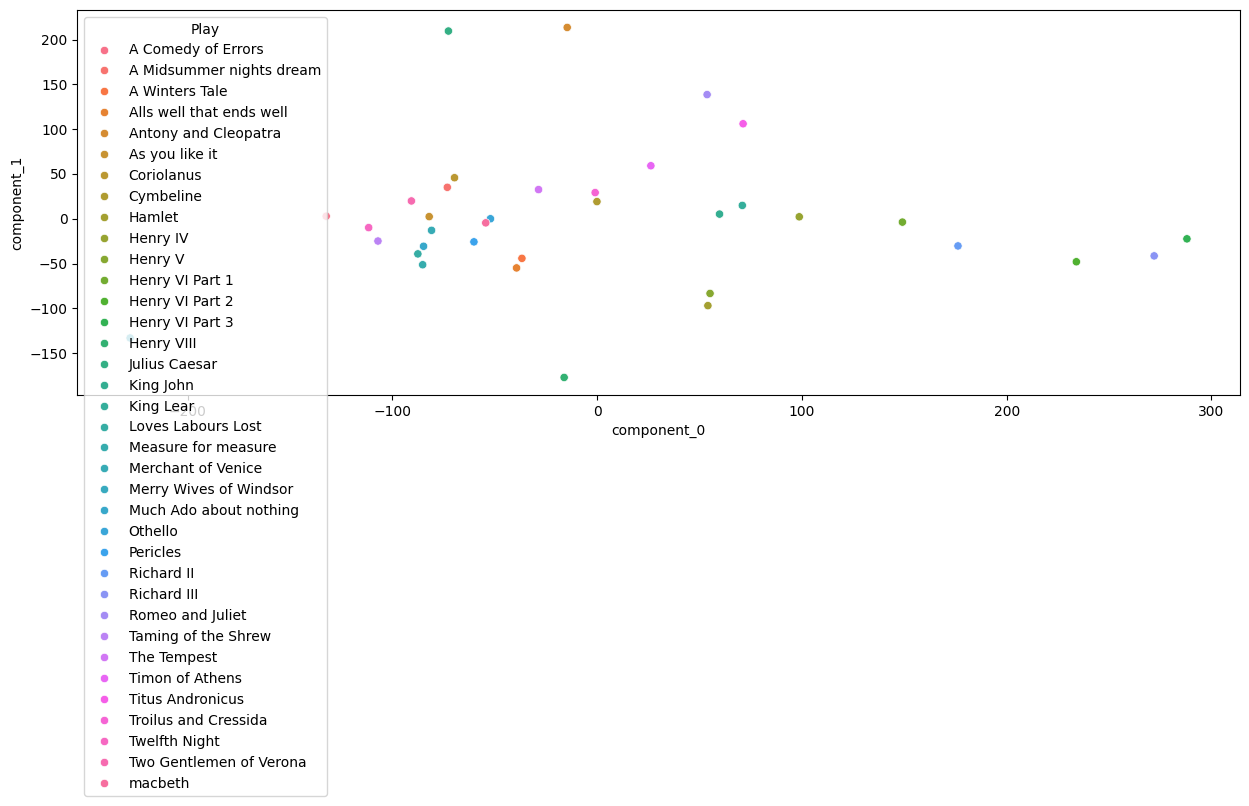

In [39]:
sns.color_palette("hls", 36)
sns.scatterplot(x="component_0", y="component_1", data=reduced_pca, hue=count_df_.index)


**Exercice:**
1. Plot the scatter plot into the 2 dimensional space.
2. Add the title of each play using plt.annotate.
3. Can you infer anything regarding the distribution in the reduced space ?

**Bonus**: 
- Find explained variance ratio using the attribute `pca.explained_variance_ratio_` and conclude regarding relevance of axis choice.

In [44]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

## Performing k-means clustering

We are going to use k-means clustering (see lecture slides) to group works that are the most similar in terms of vocabulary use, using the class `KMeans`. 

In [80]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=4, n_init="auto")
kmeans.fit(count_df_)
labels = kmeans.labels_

The `labels` list contains for each title its associated cluster.

In [82]:
count_df = count_df.assign(labels=labels)
count_df[["Play", "labels"]]

count_df[["Play", "labels"]].sort_values("labels")

for cluster in count_df.labels.unique():
    print("cluster")
    print(cluster)
    print(count_df[count_df.labels == cluster]["Play"])
    print("Most frequent words")
    word_list = count_df[count_df.labels == cluster].drop(
        ["Unnamed: 0", "Play", "PlayerLine", "lemmed_texts","labels"],
        axis=1).sum()
    word_list.columns = ["word"]
    print(word_list.sort_values(ascending=False)[:10].index.tolist())


cluster
1
0    A Comedy of Errors
Name: Play, dtype: object
Most frequent words
['antipholus', 'sir', 'come', 'man', 'dromio', 'know', 'master', 'chain', 'enter', 'home']
cluster
0
1    A Midsummer nights dream
2              A Winters Tale
3    Alls well that ends well
5              As you like it
7                   Cymbeline
8                      Hamlet
9                    Henry IV
Name: Play, dtype: object
Most frequent words
['come', 'good', 'lord', 'love', 'man', 'sir', 'know', 'let', 'enter', 'like']
cluster
2
4    Antony and Cleopatra
Name: Play, dtype: object
Most frequent words
['caesar', 'antony', 'good', 'enter', 'come', 'let', 'sir', 'man', 'know', 'cleopatra']
cluster
3
6    Coriolanus
Name: Play, dtype: object
Most frequent words
['come', 'good', 'enter', 'rome', 'marcius', 'let', 'sir', 'man', 'people', 'know']


**Exercice**:
1. Assign the `labels` column to the dataframe `count_df`.
2. Provide the list of plays within each cluster.
3. Give the 10 words with the highest term frequency per cluster.
4. Conclude regarding vocabulary overlap in Shakespeare's play.
   
**Bonus**:
1. Select the optimum number of clusters by analyzing the inertia for each value of k.
2. Test using the `DBScan` algorithm and compare results.

In [89]:
inertias = []
for k in [2, 3, 4, 5]:
    kmeans= KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(count_df_)
    inertias.append(kmeans.inertia_)

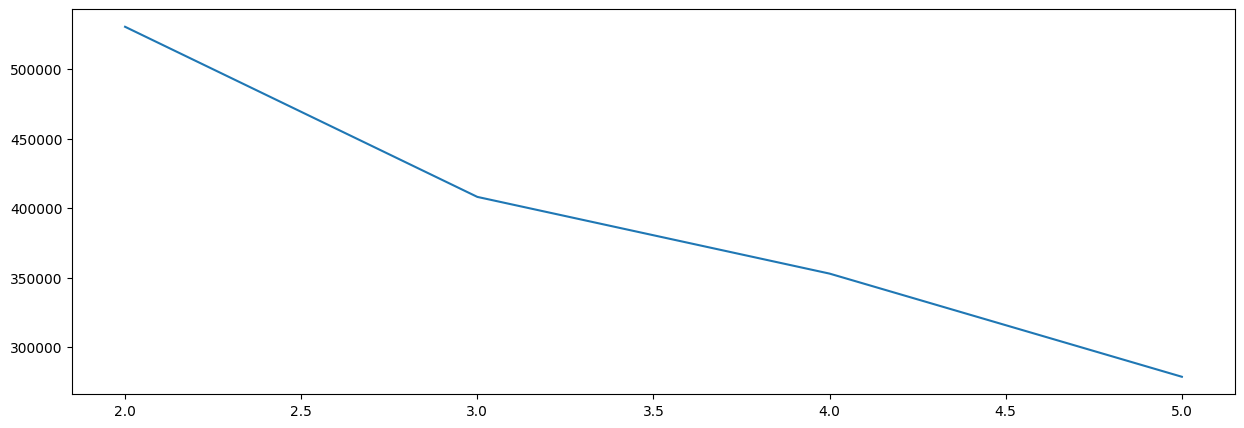

In [90]:
plt.plot([2, 3, 4, 5], inertias)

In [ ]:
count_df = count_df.assign(labels=labels)
count_df[["Play", "labels"]]

count_df[["Play", "labels"]].sort_values("labels")

for cluster in count_df.labels.unique():
    print(f"Cluster: {cluster}")
    print(count_df[count_df.labels == cluster]["Play"])


**Bonus**: document embedding using Doc2Vec.

Another possible approach to embedding is the use of *neural networks* (we'll see tomorrow the practical behind these terms).
Many models exist for this embedding, and one of the most popular one is Doc2Vec.
This model is available in the library `gensim` (you can access the documentation here: https://radimrehurek.com/gensim/models/doc2vec.html).

> Do not forget to install `gensim` if you want this code to run !
> There is a slight hiccup as `gensim` requires a lower version of scipy, so you need additionally to run: `pip install scipy==1.12`.

In [15]:
# Load required libraries
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df.PlayerLine.values.tolist())]

# vector_size controls the dimension of the embeddings
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
embeddings = pd.DataFrame([model.infer_vector(doc.split()) for doc in df.PlayerLine.values.tolist()], index=count_df.index)

**Exercice**:
1. Perform the clustering using k-means on the neural networks embedding and compare it to using count/tf-idf embedder.
2. Set the `vector_size` argument to 2 in order to get 2 dimension embeddings.
3. Plot the 2D embeddings, color and annotate according to play name and draw conclusions regarding plays similarity.